In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def qubic_spline_coeff(x_nodes, y_nodes):
    n = len(x_nodes)
    
    h = [] #список значений h
    for i in range(0, n - 1):
        t = np.around(x_nodes[i + 1] - x_nodes[i], decimals = 3)
        h.append(t)
    
    ta = [1] #главная диагональ матрицы A 
    tb = []  #диагональ ниже главной
    tc = [0] #диагональ выше главной
    for i in range(0, n - 2):
        t1 = 2 * (h[i + 1] + h[i])
        t2 = h[i]
        t3 = h[i + 1]
        ta.append(t1)
        tb.append(t2)
        tc.append(t3)
    ta.append(1)
    tb.append(0)
    
    tta = np.diag(ta, 0)    #матрица с заполненной главной диагональю, остальное - 0
    ttb = np.diag(tb, -1)   #матрица с заполненной диагональю на одну ниже главной
    ttc = np.diag(tc, 1)    #матрица с заполненной диагональю на одну выше главной
    A = tta + ttb + ttc     #складываем все три матрциы и получаем матрицу A
    revA = np.linalg.inv(A) #находим обратную матрицу A\^\ (-1)
    
    F = np.zeros(shape = (n, 1)) #получим матрицу F
    for i in range(1, n - 1):
        t1 = y_nodes[i + 1] - y_nodes[i]
        t2 = y_nodes[i] - y_nodes[i - 1]
        F[i][0] = 3 * (t1 / h[i] - t2 / h[i - 1])
    
    c = np.dot(revA, F) #находим произведение матриц A\^\ (-1)*F как матрицу коэффициентов c
    
    a = np.zeros(shape = (n - 1, 1))
    b = np.zeros(shape = (n - 1, 1))
    d = np.zeros(shape = (n - 1, 1))
    for i in range(0, n - 1):
        a[i][0] = y_nodes[i]
        b[i][0] = (1 / h[i]) * (y_nodes[i + 1] - y_nodes[i]) - h[i] / 3 * (c[i + 1] + 2 * c[i])
        d[i][0] = (c[i + 1][0] - c[i][0]) / (3 * h[i])
    
    c = np.delete(c, obj = 10, axis = 0) #удаляем последний элемент матрицы, так как тот лишний

    coeffs = np.c_[a, b, c, d]
    
    return coeffs

In [21]:
def qubic_spline(x_nodes, x, qs_coeff):
    n = len(x_nodes)
    
    for i in range(0, n - 1):
        if x >= x_nodes[i] and x <= x_nodes[i + 1]:
            a = qs_coeff[i][0]
            b = qs_coeff[i][1]
            c = qs_coeff[i][2]
            d = qs_coeff[i][3]
            difX = x - x_nodes[i]
            s_x = a + b * difX + c * difX * difX + d * difX * difX * difX
            
    return s_x

In [22]:
def d_qubic_spline(x_nodes, x, qs_coeff):
    n = len(x_nodes)
    
    for i in range(0, n - 1):
        if x >= x_nodes[i] and x <= x_nodes[i + 1]:
            b = qs_coeff[i][1]
            c = qs_coeff[i][2]
            d = qs_coeff[i][3]
            difX = x - x_nodes[i]
            d_s_x = b + 2 * c * difX + 3 * d * difX * difX
            
    return d_s_x

In [29]:
def plotDataAndInterpolant(x_nodes, y_nodes):
    qs_coeff = qubic_spline_coeff(x_nodes, y_nodes)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    x_for_plotting = np.linspace(0, 1, 1000)
    
    ax.set_xlabel('x', fontsize = 'x-large')
    ax.set_ylabel('h(x)', fontsize = 'x-large')
    ax.plot(x_for_plotting, [qubic_spline(x_nodes, x, qs_coeff) for x in x_for_plotting], '-', color = 'darkgrey', linewidth = 4)
    ax.plot(x_nodes, y_nodes, 'ro', markersize = 10)
    
    ax.grid(True)
    plt.savefig('basic.pdf')

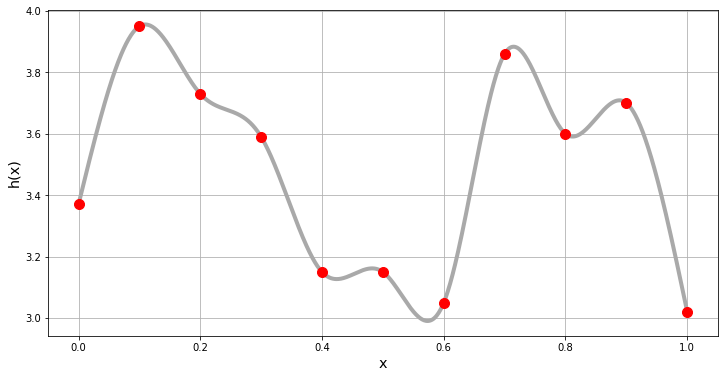

In [30]:
if __name__ == '__main__':
    x_nodes = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    y_nodes = [3.37, 3.95, 3.73, 3.59, 3.15, 3.15, 3.05, 3.86, 3.60, 3.70, 3.02]

    plotDataAndInterpolant(x_nodes, y_nodes)